# Introducción al Aprendizaje Supervisado - Regresión (Parte I)
* Vista general del Aprendizaje Supervisado
* Entrenamiento y Test de un modelo
* Regresión Lineal


## 5to año - Ingeniería en Sistemas de Información

### Facultad Regional Villa María

#### Ejercicio

Teniendo la función

$$f(x) = 0.01x + (\sin(x)^2) \times (\sin(4x)^2) \times (0.5\phi(x))$$

donde $\phi$ es la función de densidad de probabilidad normal estándar evaluada en $x$.

1. Implementar $f(x)$.
2. Obtener 500 muestras de la función $f(x)$ en el intervalo de $x=[-3 \leq x \leq 3]$.
3. Teniendo dichas muestras, graficar $f(x)$ en el intervalo de $x=[-3 \leq x \leq 3]$.
4. Dividir el conjunto total $(x,f(x))$ en un subconjunto de entrenamiento del 70% de las muestras y un subconjunto de test del 30% de las muestras.
5. Usar el subconjunto de entrenamiento para entrenar un modelo de regresión lineal para aproximar $f(x)$ en el mencionado intervalo.
6. Mostrar gráficamente la regresión para el conjunto de entrenamiento y para el conjunto de test.
7. Imprimir el error cuadrático medio para las predicciones sobre los $X$ de entrenamiento y los $X$ de test.


Fecha de entrega: **19/04/2017**.

Nota: la resolución de los ejercicios es **individual**. Está permitida la reutilización del código del notebook (por ejemplo para confeccionar gráficos).

### Resolución

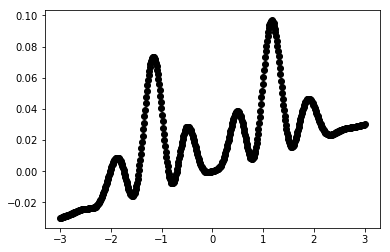

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
% matplotlib inline
#Crea el rango de muestras
x = np.linspace(-3, 3, 500)
#declara la funcion
y = 0.01*(x)+ (np.sin(x))**2 * (np.sin(4*x))**2 * (0.5*norm.pdf(x))
#Dibuja la funcion
plt.plot(x, y, 'o', color="black");


In [51]:
##Muestras
X = x[:, np.newaxis]
X

array([[-3.        ],
       [-2.98797595],
       [-2.9759519 ],
       [-2.96392786],
       [-2.95190381],
       [-2.93987976],
       [-2.92785571],
       [-2.91583166],
       [-2.90380762],
       [-2.89178357],
       [-2.87975952],
       [-2.86773547],
       [-2.85571142],
       [-2.84368737],
       [-2.83166333],
       [-2.81963928],
       [-2.80761523],
       [-2.79559118],
       [-2.78356713],
       [-2.77154309],
       [-2.75951904],
       [-2.74749499],
       [-2.73547094],
       [-2.72344689],
       [-2.71142285],
       [-2.6993988 ],
       [-2.68737475],
       [-2.6753507 ],
       [-2.66332665],
       [-2.65130261],
       [-2.63927856],
       [-2.62725451],
       [-2.61523046],
       [-2.60320641],
       [-2.59118236],
       [-2.57915832],
       [-2.56713427],
       [-2.55511022],
       [-2.54308617],
       [-2.53106212],
       [-2.51903808],
       [-2.50701403],
       [-2.49498998],
       [-2.48296593],
       [-2.47094188],
       [-2

In [52]:
##Dividir  el conjunto
X_entrenamiento = X[0:350]
X_prueba = X[350:500]
y_entrenamiento = y[0:350]
y_prueba = y[350:500] 


In [53]:
from sklearn.linear_model import LinearRegression
#Creamos el objeto de la regresion lineal
regressor = LinearRegression()
#Entrenamos el modelo usando los conjuntos de entrenamiento
regressor.fit(X_entrenamiento, y_entrenamiento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
#Coeficientes

print('Weight coefficients (beta_1): ', regressor.coef_)
print('y-axis intercept (beta_0): ', regressor.intercept_)

Weight coefficients (beta_1):  [ 0.01608022]
y-axis intercept (beta_0):  0.0254445673114


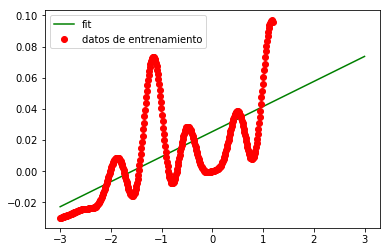

In [55]:
#Se muestra gráficamente la regresión para el conjunto de entrenamiento
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt], label="fit", color="green")
plt.plot(X_entrenamiento, y_entrenamiento, 'o', label="datos de entrenamiento", color="red")
plt.legend(loc='best')


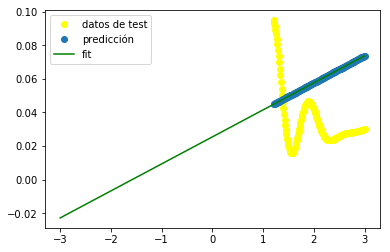

In [43]:
#Se muestra gráficamente la regresión para el conjunto de datos de test:

y_pred_prueba = regressor.predict(X_test)
plt.plot(X_prueba, y_prueba, 'o', label="datos de test", color="yellow")
plt.plot(X_prueba, y_pred_prueba, 'o', label="predicción")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit', color="green")
plt.legend(loc='best');

In [56]:
#Cuan buena es la prediccion

regressor.score(X_prueba, y_prueba)

-3.1259166729745385

In [57]:
# Error cuadrático medio:

from sklearn.metrics import mean_squared_error

mean_squared_error(y_prueba, y_pred_prueba)

0.0010926307695542973